In [1]:
import pickle
import os
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
print(os.getcwd())

D:\Coding\TensorFlow\FootballerDetection


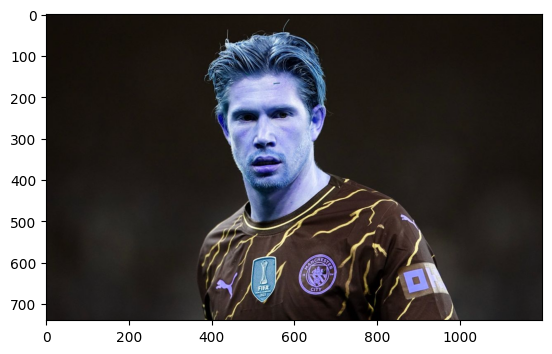

In [3]:
img = cv2.imread('./image.jpeg')
plt.imshow(img)

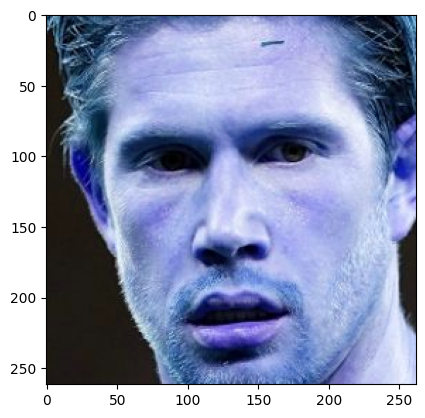

In [4]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
(x,y,w,h) = faces[0]
roi_color = img[y:y+h, x:x+w]
plt.imshow(roi_color)

In [5]:
import numpy as np
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

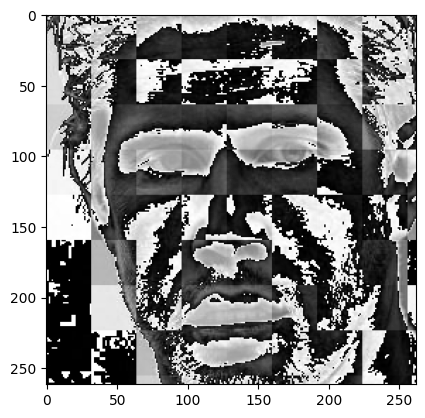

In [6]:
cropped_img = np.array(roi_color)
scalled_raw_img = cv2.resize(cropped_img, (32, 32))
img_har = w2d(cropped_img,'db1',5)
scalled_img_har = cv2.resize(img_har, (32, 32))
combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))).astype(float)
plt.imshow(img_har, cmap='gray')

In [7]:
combined_img = combined_img.reshape(4096,).astype(float)
combined_img

array([124., 163., 194., ...,   3.,  13.,   7.])

In [8]:
from sklearn.pipeline import Pipeline

In [9]:
import joblib
pipe = joblib.load('saved_model.pkl')
result = pipe.predict([combined_img])
result[0]

1

In [10]:
keys = {0:'bernardo', 1:'debruyne', 2:'foden', 3:'haaland', 4:'rodri'}
keys[result[0]]

'debruyne'